In [1]:
library(rdydisstools)
library(ggplot2)
setwd('~/notebooks/dissertation')
loadpackages(c('doParallel', 'foreach', 'logging', 'glue', 'grid', 'gridExtra', 'dplyr', 'ggplot2'))
df <- load('artifacts/rq1/maxJ.RData')

## mean(maxJ) over all samples. If informedness is better than chance in 75% of samples go go go.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


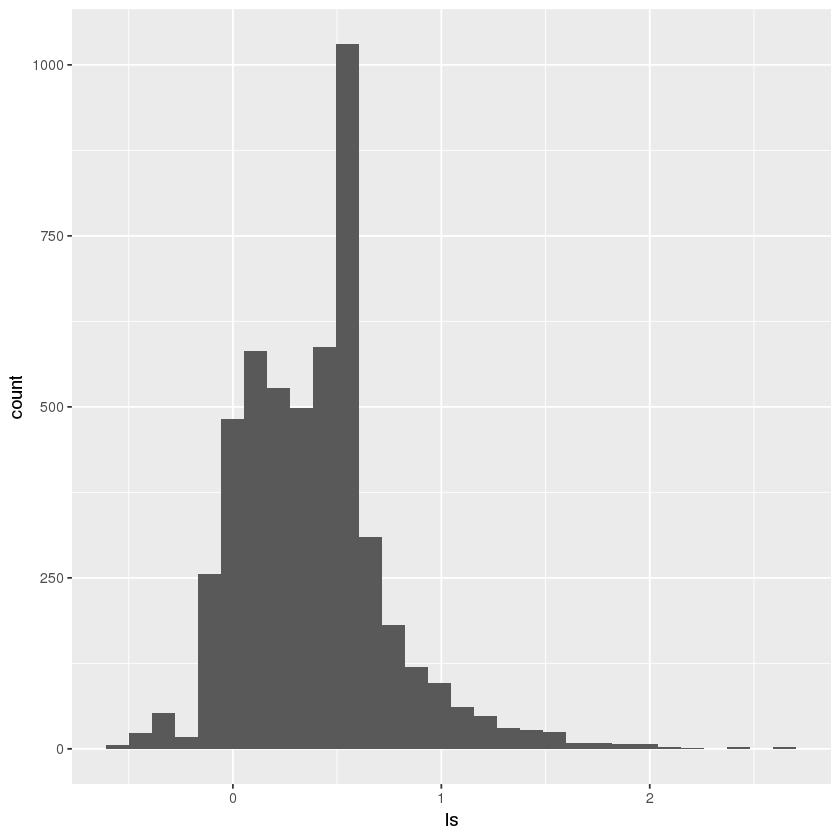

In [11]:
maxJ %>% ggplot(aes(x=ls)) + geom_histogram()

## Look at stability of the SD at which J is max across samples

[1] 0.1672

[1] 0.9538

[1] 0.7866

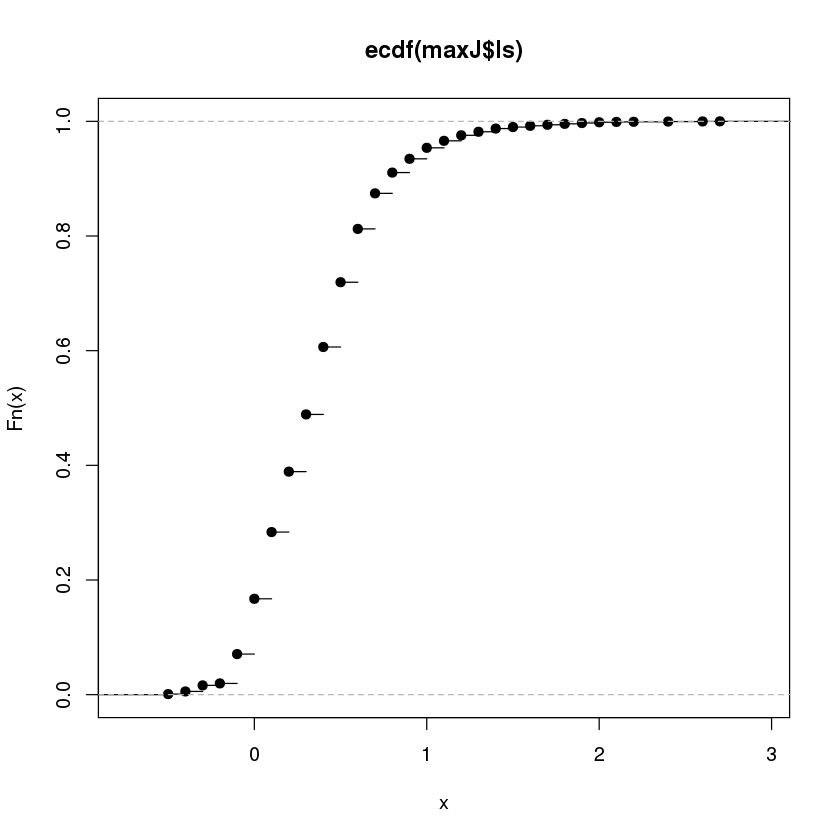

In [27]:
plot(ecdf(maxJ$ls))
f <- ecdf(maxJ$ls)
f(0)
f(1)
f(1)- f(0)

In [5]:
# Range here is misleading. It's actually the point along the range that 
# the maximum informedness was located. Basically the maxLookup uses a
# data frame with columns range, informedness, with range taking on all
# of the values of the range -3:3 by .1 increments. Then it finds the
# maximum value of informedness and takes that row (i.e. the informedness
# and it's associated location along the range). The code makes this 
# difficult to follow if you don't know this.


,ls.range,ls.informedness,ls.meanJ,ls.sdJ,eo.range,eo.informedness,eo.meanJ,eo.sdJ,md.range,md.informedness,md.meanJ,md.sdJ
31,0.0,0.3591659,0.14512739,0.13173527,-0.3,0.13494576,0.008290483,0.02819063,1.4,0.1449073,0.02921494,0.07223822
36,0.5,0.2142857,0.10869886,0.10508109,0.6,0.10601673,0.037241281,0.04143076,0.4,0.2226512,0.05523293,0.09172386
39,0.8,0.2400000,0.12024159,0.11493342,-0.1,0.12842105,0.011458154,0.03810376,0.3,0.3410526,0.12075928,0.09210940
32,0.1,0.1851038,0.08996978,0.08976647,0.3,0.10280830,0.027050181,0.02984244,0.5,0.2319902,0.03557317,0.08736082
42,1.1,0.1142857,0.04556924,0.06500177,0.5,0.18156682,0.055359976,0.05429461,0.9,0.4165899,0.14924832,0.14349445
311,0.0,0.2258242,0.10094654,0.09740270,-0.5,0.08805031,0.013636637,0.02589012,0.0,0.1371829,0.03662731,0.05849961


In [ ]:
load(file='~/notebooks/dissertation/artifacts/rq1/maxJ.RData')
maxJ %>% ggplot(aes(x=ls.range)) + geom_histogram(aes(y=stat(count))) +
    ggtitle(glue::glue('Figure 5: Histogram of SD thresholds for Max J')) +
    xlim(c(-3,3)) +
    theme(legend.position="bottom", text=element_text(family="Times New Roman", size=12))
